<a href="https://colab.research.google.com/github/saad-the-noob/Skill_Morph_Assignment/blob/main/Assignment_6_Introduction_to_Machine_Learning_Skill_Morph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
print("Welcome to Cancer Detection with Skill Morph!")
print("We will build a Skill Moprh Doctor to detect breast cancer!")

Welcome to Cancer Detection with Skill Morph!
We will build a Skill Moprh Doctor to detect breast cancer!


In [95]:
#Question 1: Find the Best Tree Depth

#Task: Test depths 3, 4, 5 and find highest accuracy

#Optional: Feature: 10; test depths 5,6,7,8,9

#Question 2: Calculate All Metrics

#Task: Use best depth to calculate precision, recall, F1-score

#Question 3: Test on New Patients

#Question 4: Analyze Confusion Matrix

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['Breast_Cancer_Wisconsin_Dataset(2).csv']))

Saving Breast_Cancer_Wisconsin_Dataset(2).csv to Breast_Cancer_Wisconsin_Dataset(2).csv


In [70]:
# Convert diagnosis to numbers
data['diagnosis_numeric'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Select only the most important features (make it simple!)
important_features = ['concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se',	'texture_se']

 # Create simple dataset
X = data[important_features]  # Patient measurements
y = data['diagnosis_numeric']  # Malignant (1) or Benign (0)


# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.2, random_state=40)

In [71]:
# Train with Decision Tree

# Create our Skill Morph model
skillmorph_doctor = DecisionTreeClassifier(
    max_depth=6,
    random_state=42)

# Train the model
skillmorph_doctor.fit(X_train, y_train)
print("Skill Morph doctor training completed!")

Skill Morph doctor training completed!


In [72]:
#Test our Skill Morph Doctor

# Make predictions
predictions = skillmorph_doctor.predict(X_test)         # gives predictions (Benine(0) or Malignant(1))
prediction_probabilities = skillmorph_doctor.predict_proba(X_test)[:, 1]  # Probability of malignant cancer (class 1)


# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Skill Morph Doctor Accuracy: {accuracy*100:.1f}%")


if accuracy > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif accuracy > 0.80:
    print("OK! Our Skill Morph doctor is decent!")
else:
    print("Needs improvement...")


Skill Morph Doctor Accuracy: 92.1%
GOOD! Our Skill Morph doctor performs well!


In [73]:
# Show some predictions vs reality with confidence

print(f"\nLet's check some predictions with confidence:")
print("Patient | Actual      | Skill Morph Predicted | Confidence | Correct?")
print("-" * 70)

for i in range(10):
    actual = "Malignant" if y_test.iloc[i] == 1 else "Benign"
    predicted = "Malignant" if predictions[i] == 1 else "Benign"
    confidence = prediction_probabilities[i] * 100 if predictions[i] == 1 else (1 - prediction_probabilities[i]) * 100
    correct = "✅" if y_test.iloc[i] == predictions[i] else "❌"
    print(f"{i+1:7} | {actual:11} | {predicted:21} | {confidence:8.1f}%  | {correct}")


Let's check some predictions with confidence:
Patient | Actual      | Skill Morph Predicted | Confidence | Correct?
----------------------------------------------------------------------
      1 | Benign      | Benign                |     99.4%  | ✅
      2 | Malignant   | Malignant             |    100.0%  | ✅
      3 | Benign      | Benign                |     99.4%  | ✅
      4 | Benign      | Benign                |    100.0%  | ✅
      5 | Malignant   | Malignant             |    100.0%  | ✅
      6 | Benign      | Benign                |    100.0%  | ✅
      7 | Benign      | Benign                |    100.0%  | ✅
      8 | Benign      | Benign                |     94.0%  | ✅
      9 | Benign      | Malignant             |    100.0%  | ❌
     10 | Benign      | Benign                |     99.4%  | ✅


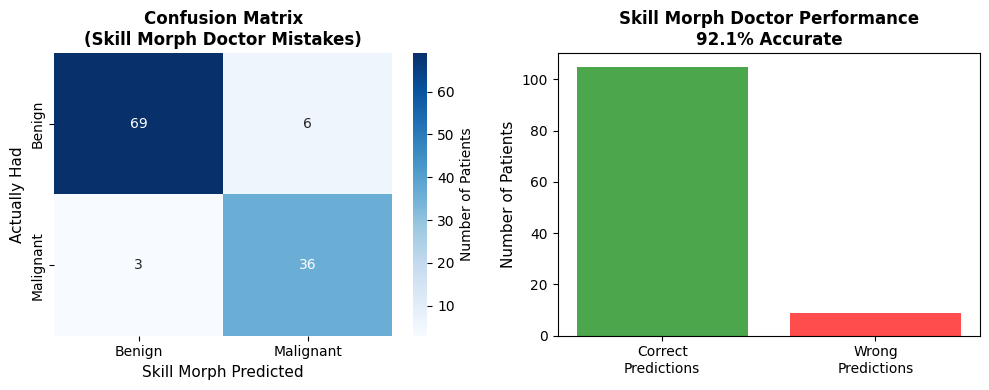

In [77]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)


# Create beautiful confusion matrix plot
plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('Confusion Matrix\n(Skill Morph Doctor Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Skill Morph Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'Skill Morph Doctor Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.tight_layout()
plt.show()

 MEDICAL EVALUATION METRICS EXPLAINED:

Think of Skill Morph as a detective looking for malignant cancer:

1️⃣ ACCURACY = Overall correctness
   → How many total cases did we get right?

2️⃣ PRECISION = When we say "MALIGNANT", how often are we right?
   → Of all "malignant" predictions, how many were actually malignant?
   → High precision = Few false alarms

3️⃣ RECALL  = Of all actual malignant cancer cases, how many did we catch?
   → Did we miss any malignant cancer patients?
   → High recall = We don't miss malignant cancer cases

4️⃣ F1-SCORE = Balance between Precision and Recall
   → Perfect balance between avoiding false alarms and catching all malignant cancers



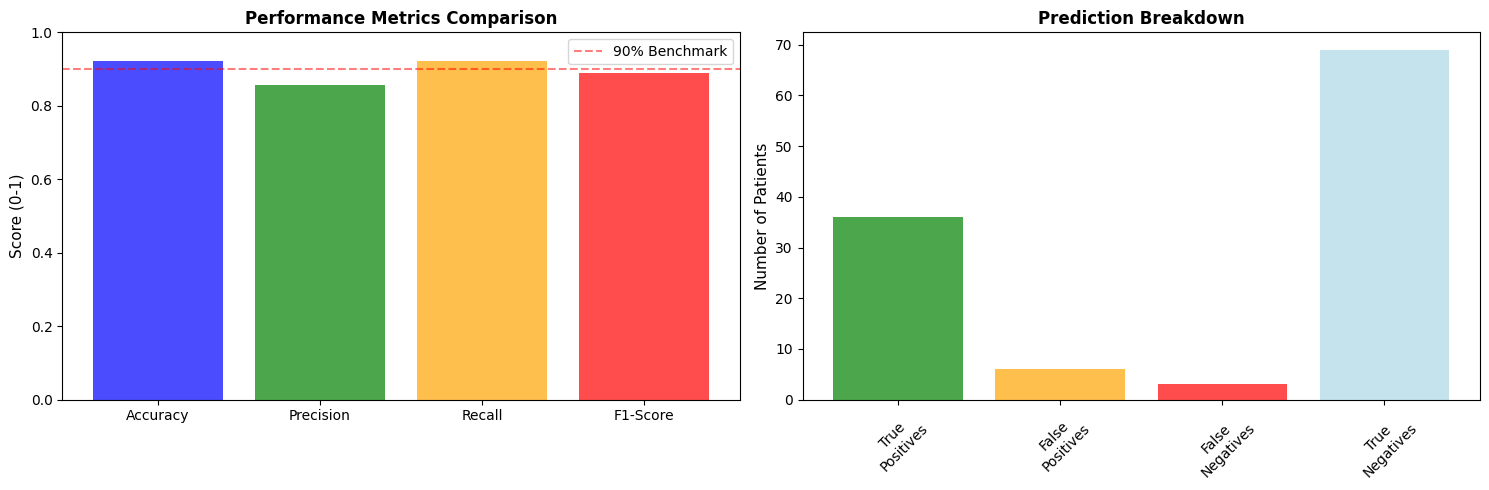

In [85]:
# Detailed Performance


print(""" MEDICAL EVALUATION METRICS EXPLAINED:

Think of Skill Morph as a detective looking for malignant cancer:

1️⃣ ACCURACY = Overall correctness
   → How many total cases did we get right?

2️⃣ PRECISION = When we say "MALIGNANT", how often are we right?
   → Of all "malignant" predictions, how many were actually malignant?
   → High precision = Few false alarms

3️⃣ RECALL  = Of all actual malignant cancer cases, how many did we catch?
   → Did we miss any malignant cancer patients?
   → High recall = We don't miss malignant cancer cases

4️⃣ F1-SCORE = Balance between Precision and Recall
   → Perfect balance between avoiding false alarms and catching all malignant cancers
""")

# Calculate detailed metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


# Create detailed metrics visualization
plt.figure(figsize=(15, 5))

# Subplot 1: Metrics comparison
plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)


# Add benchmark line
plt.axhline(y=0.9, color='red', linestyle='--', alpha=0.5, label='90% Benchmark')
plt.legend()



# Subplot 2: Precision vs Recall visualization
plt.subplot(1, 2, 2)
# Create a simple precision-recall visualization
categories = ['True\nPositives', 'False\nPositives', 'False\nNegatives', 'True\nNegatives']
tp, fp, fn, tn = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tp, fp, fn, tn]
colors_pr = ['green', 'orange', 'red', 'lightblue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.title('Prediction Breakdown', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AUC Score: 0.9115


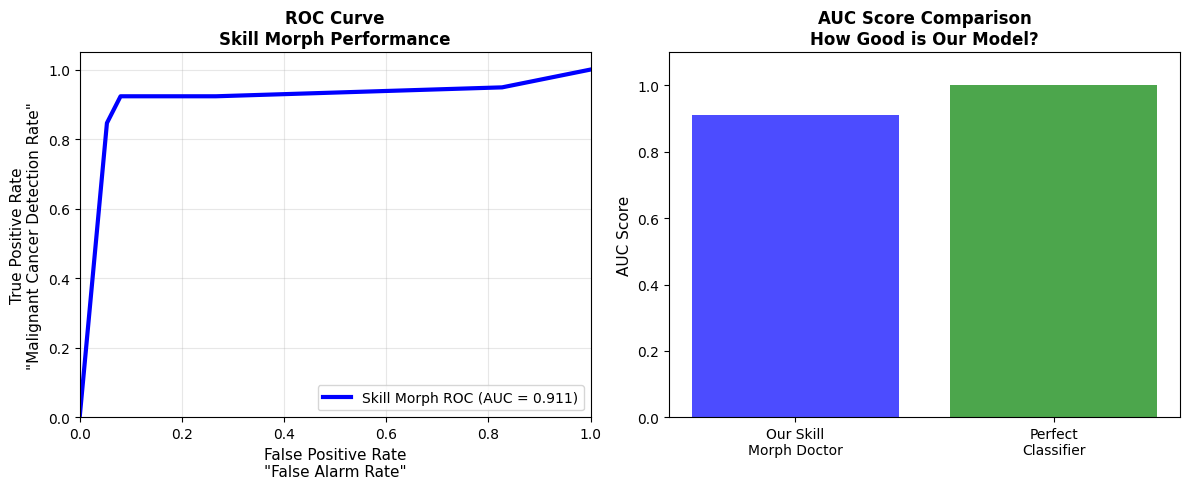

In [94]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, prediction_probabilities)
auc_score = roc_auc_score(y_test, prediction_probabilities)


print(f"AUC Score: {auc_score:.4f}")

# Create comprehensive ROC visualization
plt.figure(figsize=(12, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=3, label=f'Skill Morph ROC (AUC = {auc_score:.3f})')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate\n"False Alarm Rate"', fontsize=11)
plt.ylabel('True Positive Rate\n"Malignant Cancer Detection Rate"', fontsize=11)
plt.title('ROC Curve\nSkill Morph Performance', fontweight='bold', fontsize=12)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Subplot 2: AUC Comparison
plt.subplot(1, 2, 2)
model_names = ['Our Skill\nMorph Doctor', 'Perfect\nClassifier']
auc_scores = [auc_score, 1.0]
colors_auc = ['blue', 'green']
bars_auc = plt.bar(model_names, auc_scores, color=colors_auc, alpha=0.7)

plt.ylim(0, 1.1)
plt.ylabel('AUC Score', fontsize=11)
plt.title('AUC Score Comparison\nHow Good is Our Model?', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()
